In [8]:
# Import Libraries
# does number stuff
import pandas as pd
# used for grid searching tuning of hyperparamaters
from sklearn.model_selection import GridSearchCV
# Used for removing outliers
from sklearn.ensemble import IsolationForest
# the part that does machine learning
from sklearn.tree import DecisionTreeClassifier, plot_tree
# for testing against training data
from sklearn.metrics import accuracy_score
# For decission tree visuilization
from sklearn import tree
# for pie charts and other charts
import matplotlib.pyplot as plt

# Load the training and test data from CSV files
sink_data = pd.read_csv('C:/Users/jackw/OneDrive/Desktop/Kaggle/train.csv')
test_data = pd.read_csv('C:/Users/jackw/OneDrive/Desktop/Kaggle/test.csv')

# Fill missing values in the training data
# Calculate the median age, mode of embarked, and mode of cabin in the training set
median_age = sink_data['Age'].median()
mode_embarked = sink_data['Embarked'].mode()[0]
mode_cabin = sink_data['Cabin'].mode()[0]

# Fill missing values in the test data
# Calculate the median age, mode of embarked, and mode of cabin in the test set
median_age = test_data['Age'].median()
mode_embarked = test_data['Embarked'].mode()[0] 
mode_cabin = test_data['Cabin'].mode()[0]

# Fill missing values in the 'Cabin', 'Embarked', and 'Age' columns of the training data
sink_data.fillna({'Cabin': mode_cabin}, inplace=True)
sink_data.fillna({'Embarked': mode_embarked}, inplace=True)
sink_data.fillna({'Age': median_age}, inplace=True)
# Fill missing values in the 'Cabin', 'Embarked', and 'Age' columns of the test data
test_data.fillna({'Cabin': mode_cabin}, inplace=True)
test_data.fillna({'Embarked': mode_embarked}, inplace=True)
test_data.fillna({'Age': median_age}, inplace=True)


# Encode categorical variables in the training data using one-hot encoding
# This converts the 'Sex' and 'Embarked' columns to numerical format
sink_data = pd.get_dummies(sink_data, columns=['Sex', 'Embarked'])

# Define the feature set (X) and target variable (y) for the training data
# Drop columns that are not used for training the model
X = sink_data.drop(columns=['Name','PassengerId', 'Ticket', 'Survived', 'Cabin'])
print('Zone 1')
y = sink_data['Survived']

# Identify and remove outliers using IsolationForest
iso_forest = IsolationForest(contamination=0.05)  # 'contamination' is the proportion of outliers
yhat = iso_forest.fit_predict(X)  # Fit the model and predict outliers
# Remove outliers and novelties
# Identify inliers and outliers
mask = yhat != -1
X, y = X[mask], y[mask]  # Keep only inliers


model = DecisionTreeClassifier(max_depth=3)
print('Zone 2')

# Train the model on the training data
model.fit(X, y)
print('Zone 3')

# TEST CODE PREDICTION

# Fill missing columns in the test data that are present in the training data
# This ensures both datasets have the same columns
for col in X.columns:
    if col not in test_data.columns:
        test_data[col] = 0

# Ensure the columns in the test data are in the same order as in the training data
test_data = test_data[X.columns]

# Use the trained model to make predictions on the test data
test_predictions = model.predict(test_data)

# Create a DataFrame for the submission with 'PassengerId' and 'Survived' columns
# The 'PassengerId' is assumed to start from 892 and increments by 1
submission = pd.DataFrame({
    'PassengerId': test_data.index + 892,  # Assuming PassengerId is the index + 1
    'Survived': test_predictions
})

# Save the predictions to a CSV file for submission
submission.to_csv('C:/Users/jackw/OneDrive/Desktop/Kaggle/Titanic_Submission.csv', index=False)

Zone 1
Zone 2
Zone 3


In [9]:
# paramater grid to find best tunes for hyperparamaters
param_grid = {
   'max_depth': [3, 4, 5, 6, 7],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
   estimator=DecisionTreeClassifier(),
   param_grid=param_grid,
   scoring='accuracy',
   cv=5,  # 5-fold cross-validation
   n_jobs=-1
)

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model for prediction
test_predictions = best_model.predict(X)

print("Paramaters to use", best_params)


Paramaters to use {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [10]:
import pandas as pd
titanic_data = pd.read_csv('C:/Users/jackw/OneDrive/Desktop/Kaggle/Titanic_Submission.csv')
titanic_data

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [11]:
sink_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B57 B59 B63 B66,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B57 B59 B63 B66,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B57 B59 B63 B66,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,B57 B59 B63 B66,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",27.0,1,2,W./C. 6607,23.4500,B57 B59 B63 B66,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,False,True,True,False,False


In [12]:
# to split the training data to test the machines accuracy
from sklearn.model_selection import train_test_split 

# testing data against itself
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)


predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.8352941176470589

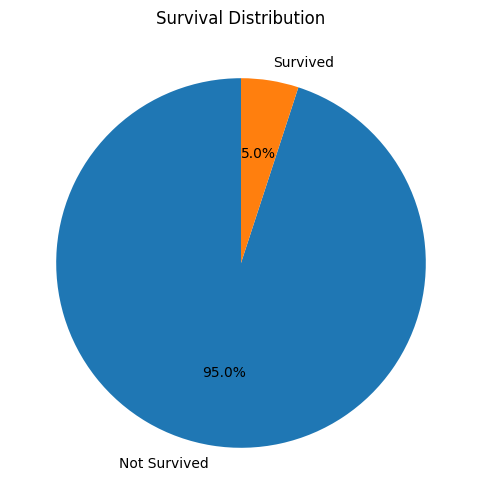

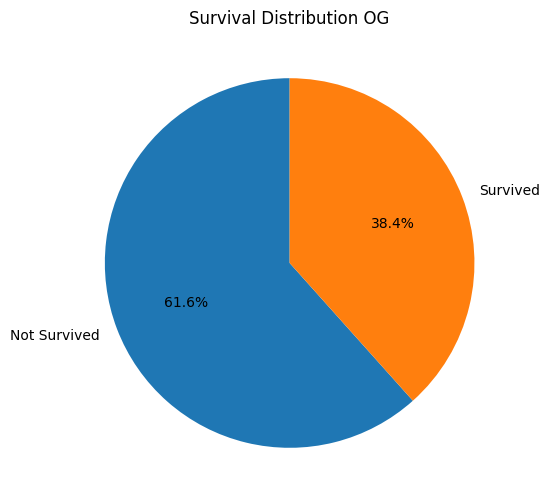

In [13]:
# Count the number of survivors
survived_count = submission['Survived'].value_counts()
survived_count_og_data = sink_data['Survived'].value_counts()

# pie charts because hell yeah
plt.figure(figsize=(6, 6))
plt.pie(survived_count, labels=['Not Survived', 'Survived',], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.show()

# OG data pie chart for comparison
plt.figure(figsize=(6, 6))
plt.pie(survived_count_og_data, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution OG')
plt.show()


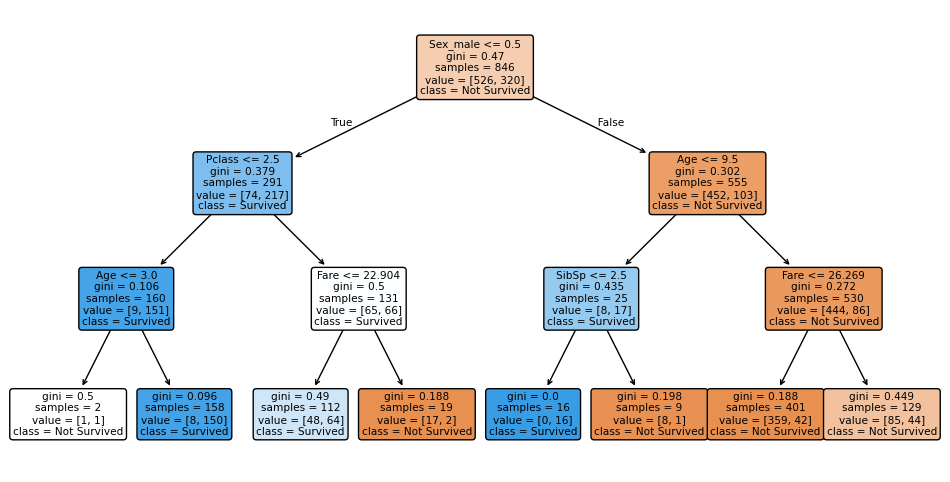

In [14]:

plt.figure(figsize=(12, 6))  # Set the plot size
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()  # Display the tree
